<a href="https://colab.research.google.com/github/MasterNathan01/4105/blob/main/WatersNathan_801283595_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch: 0, Training Loss: 25.3374, Training MAE: 4.7214, Validation Loss: 29.9798, Validation MAE: 4.9965
Epoch: 50, Training Loss: 1.9363, Training MAE: 1.0823, Validation Loss: 2.1257, Validation MAE: 1.1461
Epoch: 100, Training Loss: 1.1882, Training MAE: 0.8269, Validation Loss: 1.9744, Validation MAE: 1.0522
Epoch: 150, Training Loss: 1.0964, Training MAE: 0.7862, Validation Loss: 1.8928, Validation MAE: 1.0357
Epoch: 200, Training Loss: 1.0272, Training MAE: 0.7560, Validation Loss: 1.8215, Validation MAE: 1.0125
Epoch: 250, Training Loss: 0.9707, Training MAE: 0.7307, Validation Loss: 1.7759, Validation MAE: 0.9957
Epoch: 300, Training Loss: 0.9228, Training MAE: 0.7072, Validation Loss: 1.7581, Validation MAE: 0.9899
Epoch: 350, Training Loss: 0.8893, Training MAE: 0.6919, Validation Loss: 1.7444, Validation MAE: 0.9815
Epoch: 400, Training Loss: 0.8662, Training MAE: 0.6810, Validation Loss: 1.7481, Validation MAE: 0.9750
Epoch: 450, Training Loss: 0.8527, Training MAE: 0.6743,

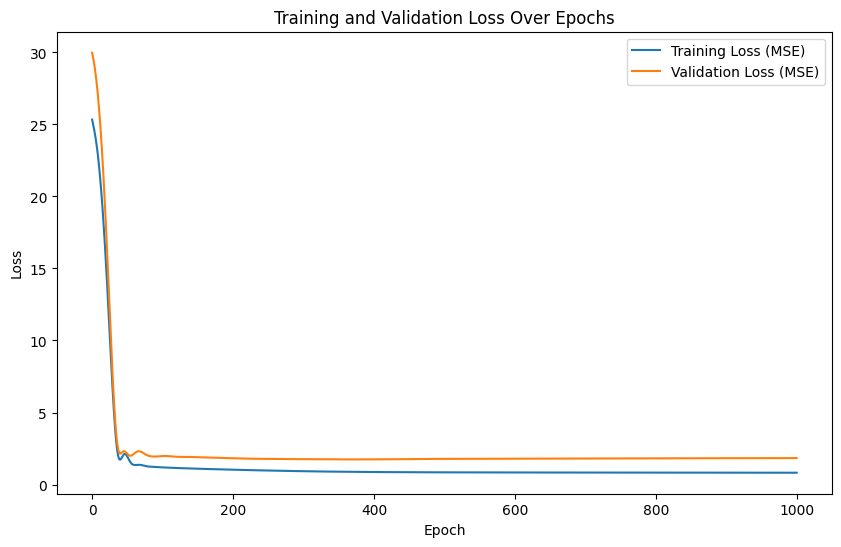

Epoch: 0, Training Loss: 25.2083, Training MAE: 4.7047, Validation Loss: 30.0761, Validation MAE: 5.0035
Epoch: 50, Training Loss: 15.2412, Training MAE: 3.6038, Validation Loss: 18.1282, Validation MAE: 3.7840
Epoch: 100, Training Loss: 1.8120, Training MAE: 1.0227, Validation Loss: 2.4549, Validation MAE: 1.1362
Epoch: 150, Training Loss: 1.8240, Training MAE: 1.0166, Validation Loss: 2.1576, Validation MAE: 1.0719
Epoch: 200, Training Loss: 1.6227, Training MAE: 0.9539, Validation Loss: 2.0705, Validation MAE: 1.0546
Epoch: 250, Training Loss: 1.4817, Training MAE: 0.9073, Validation Loss: 2.0223, Validation MAE: 1.0410
Epoch: 300, Training Loss: 1.2759, Training MAE: 0.8550, Validation Loss: 1.9839, Validation MAE: 1.0284
Epoch: 350, Training Loss: 1.2667, Training MAE: 0.8638, Validation Loss: 1.9688, Validation MAE: 1.0310
Epoch: 400, Training Loss: 1.2404, Training MAE: 0.8322, Validation Loss: 1.9368, Validation MAE: 1.0252
Epoch: 450, Training Loss: 1.2043, Training MAE: 0.832

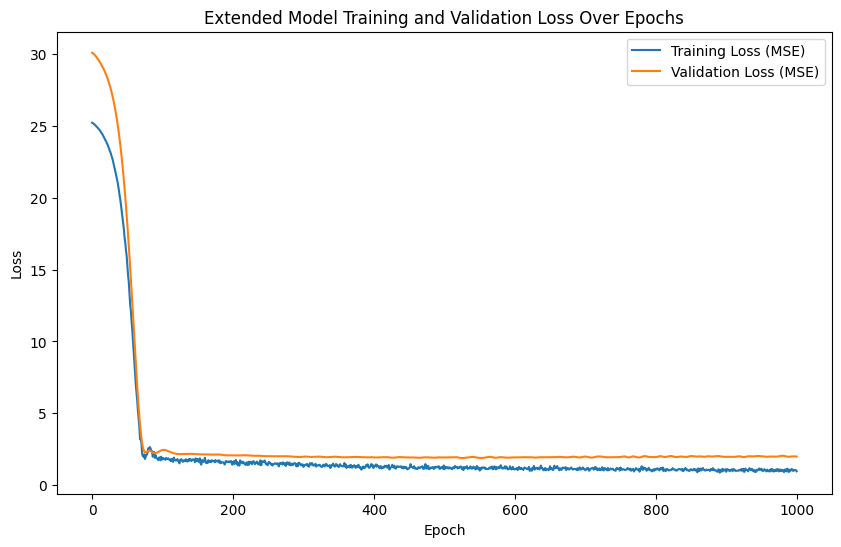

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
tf.random.set_seed(42)

data_url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
data = pd.read_csv(data_url)

categorical_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea', 'furnishingstatus']
data = pd.get_dummies(data, columns=categorical_vars, drop_first=True)
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data['price'] = data['price'] / 1e6

X = data.drop('price', axis=1).values.astype(np.float32)
y = data['price'].values.astype(np.float32).reshape(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

n_features = X_train.shape[1]
n_hidden = 8
n_output = 1

W_hidden = tf.Variable(tf.random.normal([n_features, n_hidden], stddev=0.1))
b_hidden = tf.Variable(tf.zeros([n_hidden]))
W_output = tf.Variable(tf.random.normal([n_hidden, n_output], stddev=0.1))
b_output = tf.Variable(tf.zeros([n_output]))

def neural_net(x):
    hidden_layer = tf.add(tf.matmul(x, W_hidden), b_hidden)
    hidden_layer = tf.nn.relu(hidden_layer)
    output_layer = tf.add(tf.matmul(hidden_layer, W_output), b_output)
    return output_layer

def loss_fn(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.Adam(learning_rate=0.01)
epochs = 1000
display_step = 50

start_time = time.time()

train_losses = []
val_losses = []

for epoch in range(epochs + 1):
    with tf.GradientTape() as tape:
        y_pred = neural_net(X_train)
        loss = loss_fn(y_pred, y_train)
    gradients = tape.gradient(loss, [W_hidden, b_hidden, W_output, b_output])
    optimizer.apply_gradients(zip(gradients, [W_hidden, b_hidden, W_output, b_output]))
    y_val_pred = neural_net(X_val)
    val_loss = loss_fn(y_val_pred, y_val)
    train_losses.append(loss.numpy())
    val_losses.append(val_loss.numpy())

    if epoch % display_step == 0:
        train_mae = tf.reduce_mean(tf.abs(y_pred - y_train)).numpy()
        val_mae = tf.reduce_mean(tf.abs(y_val_pred - y_val)).numpy()
        print(f"Epoch: {epoch}, Training Loss: {loss.numpy():.4f}, Training MAE: {train_mae:.4f}, "f"Validation Loss: {val_loss.numpy():.4f}, Validation MAE: {val_mae:.4f}")

end_time = time.time()
training_time = end_time - start_time
print(f"\nTotal Training Time: {training_time:.2f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss (MSE)')
plt.plot(val_losses, label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


n_hidden1 = 64
n_hidden2 = 32
n_hidden3 = 8
n_output = 1

W_hidden1 = tf.Variable(tf.random.normal([n_features, n_hidden1], stddev=0.1))
b_hidden1 = tf.Variable(tf.zeros([n_hidden1]))

W_hidden2 = tf.Variable(tf.random.normal([n_hidden1, n_hidden2], stddev=0.1))
b_hidden2 = tf.Variable(tf.zeros([n_hidden2]))

W_hidden3 = tf.Variable(tf.random.normal([n_hidden2, n_hidden3], stddev=0.1))
b_hidden3 = tf.Variable(tf.zeros([n_hidden3]))

W_output = tf.Variable(tf.random.normal([n_hidden3, n_output], stddev=0.1))
b_output = tf.Variable(tf.zeros([n_output]))

def extended_neural_net(x, training=True):
    hidden_layer1 = tf.add(tf.matmul(x, W_hidden1), b_hidden1)
    hidden_layer1 = tf.nn.relu(hidden_layer1)
    if training:
        hidden_layer1 = tf.nn.dropout(hidden_layer1, rate=0.2)
    hidden_layer2 = tf.add(tf.matmul(hidden_layer1, W_hidden2), b_hidden2)
    hidden_layer2 = tf.nn.relu(hidden_layer2)
    if training:
        hidden_layer2 = tf.nn.dropout(hidden_layer2, rate=0.2)
    hidden_layer3 = tf.add(tf.matmul(hidden_layer2, W_hidden3), b_hidden3)
    hidden_layer3 = tf.nn.relu(hidden_layer3)
    output_layer = tf.add(tf.matmul(hidden_layer3, W_output), b_output)
    return output_layer

optimizer = tf.optimizers.Adam(learning_rate=0.001)

epochs = 1000
display_step = 50

start_time_ext = time.time()
train_losses_ext = []
val_losses_ext = []

for epoch in range(epochs + 1):
    with tf.GradientTape() as tape:
        y_pred = extended_neural_net(X_train, training=True)
        loss = loss_fn(y_pred, y_train)
    variables = [W_hidden1, b_hidden1, W_hidden2, b_hidden2, W_hidden3, b_hidden3, W_output, b_output]
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    y_val_pred = extended_neural_net(X_val, training=False)
    val_loss = loss_fn(y_val_pred, y_val)
    train_losses_ext.append(loss.numpy())
    val_losses_ext.append(val_loss.numpy())
    if epoch % display_step == 0:
        train_mae = tf.reduce_mean(tf.abs(y_pred - y_train)).numpy()
        val_mae = tf.reduce_mean(tf.abs(y_val_pred - y_val)).numpy()
        print(f"Epoch: {epoch}, Training Loss: {loss.numpy():.4f}, Training MAE: {train_mae:.4f}, "f"Validation Loss: {val_loss.numpy():.4f}, Validation MAE: {val_mae:.4f}")

end_time_ext = time.time()
training_time_ext = end_time_ext - start_time_ext
print(f"\nTotal Extended Model Training Time: {training_time_ext:.2f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(train_losses_ext, label='Training Loss (MSE)')
plt.plot(val_losses_ext, label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Extended Model Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

Epoch: 0, Training Loss: 0.6814, Training Accuracy: 0.5121, Validation Loss: 0.6762, Validation Accuracy: 0.5614
Epoch: 50, Training Loss: 0.2991, Training Accuracy: 0.9582, Validation Loss: 0.3296, Validation Accuracy: 0.9211
Epoch: 100, Training Loss: 0.1512, Training Accuracy: 0.9714, Validation Loss: 0.1908, Validation Accuracy: 0.9561
Epoch: 150, Training Loss: 0.1022, Training Accuracy: 0.9802, Validation Loss: 0.1410, Validation Accuracy: 0.9561
Epoch: 200, Training Loss: 0.0797, Training Accuracy: 0.9846, Validation Loss: 0.1182, Validation Accuracy: 0.9649
Epoch: 250, Training Loss: 0.0670, Training Accuracy: 0.9846, Validation Loss: 0.1051, Validation Accuracy: 0.9649
Epoch: 300, Training Loss: 0.0587, Training Accuracy: 0.9890, Validation Loss: 0.0971, Validation Accuracy: 0.9737
Epoch: 350, Training Loss: 0.0526, Training Accuracy: 0.9890, Validation Loss: 0.0922, Validation Accuracy: 0.9649
Epoch: 400, Training Loss: 0.0478, Training Accuracy: 0.9890, Validation Loss: 0.08

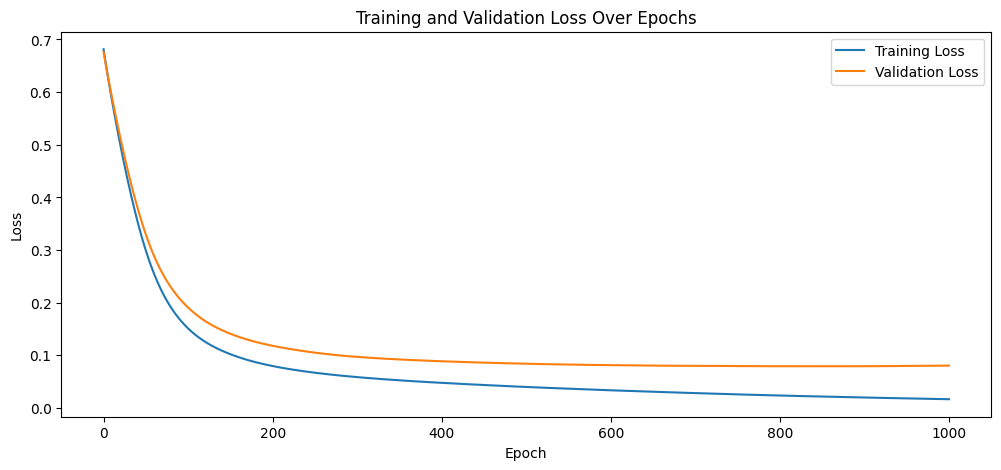

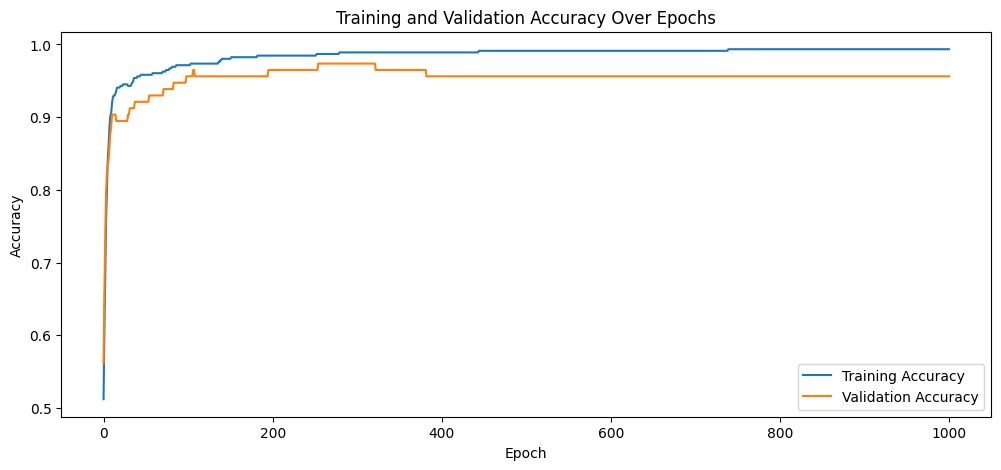

Final Validation Accuracy: 95.61%
Epoch: 0, Training Loss: 0.6931, Training Accuracy: 0.4769, Validation Loss: 0.6896, Validation Accuracy: 0.6316
Epoch: 50, Training Loss: 0.2058, Training Accuracy: 0.9626, Validation Loss: 0.2225, Validation Accuracy: 0.9211
Epoch: 100, Training Loss: 0.0632, Training Accuracy: 0.9802, Validation Loss: 0.1121, Validation Accuracy: 0.9561
Epoch: 150, Training Loss: 0.0324, Training Accuracy: 0.9934, Validation Loss: 0.1245, Validation Accuracy: 0.9474
Epoch: 200, Training Loss: 0.0167, Training Accuracy: 0.9978, Validation Loss: 0.1364, Validation Accuracy: 0.9561
Epoch: 250, Training Loss: 0.0129, Training Accuracy: 0.9956, Validation Loss: 0.1540, Validation Accuracy: 0.9561
Epoch: 300, Training Loss: 0.0100, Training Accuracy: 0.9978, Validation Loss: 0.1632, Validation Accuracy: 0.9561
Epoch: 350, Training Loss: 0.0067, Training Accuracy: 0.9978, Validation Loss: 0.1889, Validation Accuracy: 0.9561
Epoch: 400, Training Loss: 0.0037, Training Accur

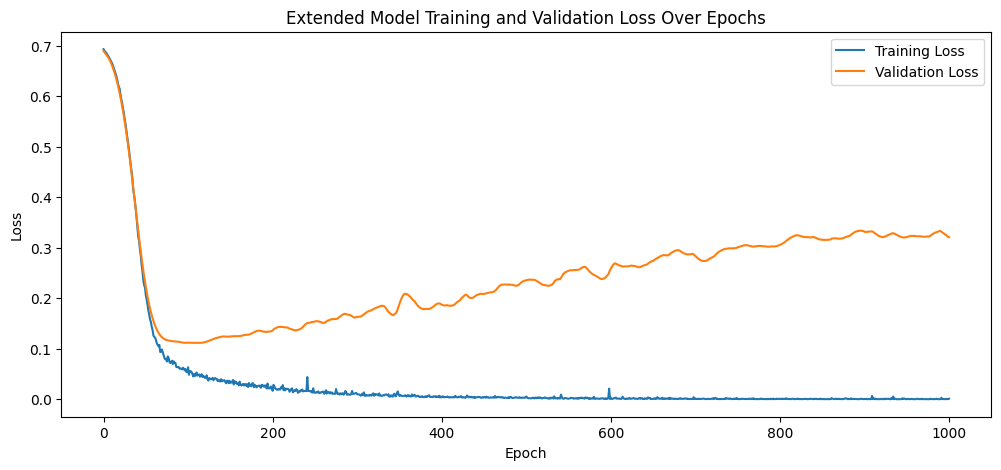

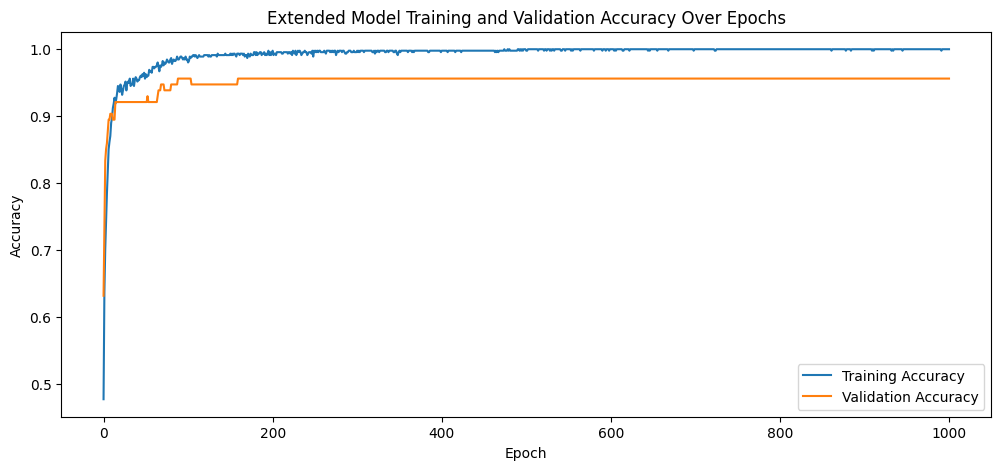

Final Validation Accuracy (Extended Model): 95.61%


In [10]:
from sklearn.datasets import load_breast_cancer

np.random.seed(42)
tf.random.set_seed(42)

cancer_data = load_breast_cancer()
X = cancer_data.data.astype(np.float32)
y = cancer_data.target.astype(np.float32).reshape(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

n_features = X_train.shape[1]
n_hidden = 32
n_output = 1

W_hidden = tf.Variable(tf.random.normal([n_features, n_hidden], stddev=0.1))
b_hidden = tf.Variable(tf.zeros([n_hidden]))
W_output = tf.Variable(tf.random.normal([n_hidden, n_output], stddev=0.1))
b_output = tf.Variable(tf.zeros([n_output]))

def neural_net(x):
    hidden_layer = tf.add(tf.matmul(x, W_hidden), b_hidden)
    hidden_layer = tf.nn.relu(hidden_layer)
    logits = tf.add(tf.matmul(hidden_layer, W_output), b_output)
    output = tf.nn.sigmoid(logits)
    return output

def loss_fn(y_pred, y_true):
    epsilon = 1e-7
    y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
    loss = -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    return loss

def accuracy(y_pred, y_true):
    correct_predictions = tf.equal(tf.round(y_pred), y_true)
    acc = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    return acc

optimizer = tf.optimizers.Adam(learning_rate=0.001)
epochs = 1000
display_step = 50
start_time = time.time()
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs + 1):
    with tf.GradientTape() as tape:
        y_pred = neural_net(X_train)
        loss = loss_fn(y_pred, y_train)
    gradients = tape.gradient(loss, [W_hidden, b_hidden, W_output, b_output])
    optimizer.apply_gradients(zip(gradients, [W_hidden, b_hidden, W_output, b_output]))

    train_acc = accuracy(y_pred, y_train).numpy()
    train_losses.append(loss.numpy())
    train_accuracies.append(train_acc)

    y_val_pred = neural_net(X_val)
    val_loss = loss_fn(y_val_pred, y_val)
    val_acc = accuracy(y_val_pred, y_val).numpy()
    val_losses.append(val_loss.numpy())
    val_accuracies.append(val_acc)

    if epoch % display_step == 0:
        print(f"Epoch: {epoch}, Training Loss: {loss.numpy():.4f}, Training Accuracy: {train_acc:.4f}, "
              f"Validation Loss: {val_loss.numpy():.4f}, Validation Accuracy: {val_acc:.4f}")
end_time = time.time()
training_time = end_time - start_time
print(f"\nTotal Training Time: {training_time:.2f} seconds")

plt.figure(figsize=(12, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

final_val_accuracy = val_accuracies[-1]
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")

n_hidden1 = 64
n_hidden2 = 32
n_hidden3 = 16
n_output = 1

W_hidden1 = tf.Variable(tf.random.normal([n_features, n_hidden1], stddev=0.1))
b_hidden1 = tf.Variable(tf.zeros([n_hidden1]))
W_hidden2 = tf.Variable(tf.random.normal([n_hidden1, n_hidden2], stddev=0.1))
b_hidden2 = tf.Variable(tf.zeros([n_hidden2]))
W_hidden3 = tf.Variable(tf.random.normal([n_hidden2, n_hidden3], stddev=0.1))
b_hidden3 = tf.Variable(tf.zeros([n_hidden3]))
W_output = tf.Variable(tf.random.normal([n_hidden3, n_output], stddev=0.1))
b_output = tf.Variable(tf.zeros([n_output]))

def extended_neural_net(x, training=True):
    hidden_layer1 = tf.add(tf.matmul(x, W_hidden1), b_hidden1)
    hidden_layer1 = tf.nn.relu(hidden_layer1)
    if training:
        hidden_layer1 = tf.nn.dropout(hidden_layer1, rate=0.2)
    hidden_layer2 = tf.add(tf.matmul(hidden_layer1, W_hidden2), b_hidden2)
    hidden_layer2 = tf.nn.relu(hidden_layer2)
    if training:
        hidden_layer2 = tf.nn.dropout(hidden_layer2, rate=0.2)
    hidden_layer3 = tf.add(tf.matmul(hidden_layer2, W_hidden3), b_hidden3)
    hidden_layer3 = tf.nn.relu(hidden_layer3)
    logits = tf.add(tf.matmul(hidden_layer3, W_output), b_output)
    output = tf.nn.sigmoid(logits)
    return output

optimizer = tf.optimizers.Adam(learning_rate=0.001)
epochs = 1000
display_step = 50
start_time_ext = time.time()
train_losses_ext = []
val_losses_ext = []
train_accuracies_ext = []
val_accuracies_ext = []

for epoch in range(epochs + 1):
    with tf.GradientTape() as tape:
        y_pred = extended_neural_net(X_train, training=True)
        loss = loss_fn(y_pred, y_train)
    variables = [
        W_hidden1, b_hidden1,
        W_hidden2, b_hidden2,
        W_hidden3, b_hidden3,
        W_output, b_output
    ]
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))

    train_acc = accuracy(y_pred, y_train).numpy()
    train_losses_ext.append(loss.numpy())
    train_accuracies_ext.append(train_acc)

    y_val_pred = extended_neural_net(X_val, training=False)
    val_loss = loss_fn(y_val_pred, y_val)
    val_acc = accuracy(y_val_pred, y_val).numpy()
    val_losses_ext.append(val_loss.numpy())
    val_accuracies_ext.append(val_acc)

    if epoch % display_step == 0:
        print(f"Epoch: {epoch}, Training Loss: {loss.numpy():.4f}, Training Accuracy: {train_acc:.4f}, "
              f"Validation Loss: {val_loss.numpy():.4f}, Validation Accuracy: {val_acc:.4f}")

end_time_ext = time.time()
training_time_ext = end_time_ext - start_time_ext
print(f"\nTotal Extended Model Training Time: {training_time_ext:.2f} seconds")

plt.figure(figsize=(12, 5))
plt.plot(train_losses_ext, label='Training Loss')
plt.plot(val_losses_ext, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Extended Model Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(train_accuracies_ext, label='Training Accuracy')
plt.plot(val_accuracies_ext, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Extended Model Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

final_val_accuracy_ext = val_accuracies_ext[-1]
print(f"Final Validation Accuracy (Extended Model): {final_val_accuracy_ext * 100:.2f}%")


Using device: cuda
Files already downloaded and verified
Files already downloaded and verified
Epoch [1/100], Loss: 1.6482, Accuracy: 42.19%
Epoch [10/100], Loss: 1.0039, Accuracy: 65.44%
Epoch [20/100], Loss: 0.6828, Accuracy: 76.65%
Epoch [30/100], Loss: 0.4740, Accuracy: 84.05%
Epoch [40/100], Loss: 0.3683, Accuracy: 87.79%
Epoch [50/100], Loss: 0.2998, Accuracy: 90.41%
Epoch [60/100], Loss: 0.2549, Accuracy: 92.06%
Epoch [70/100], Loss: 0.2390, Accuracy: 92.64%
Epoch [80/100], Loss: 0.1975, Accuracy: 93.91%
Epoch [90/100], Loss: 0.1894, Accuracy: 94.61%
Epoch [100/100], Loss: 0.1828, Accuracy: 94.73%

Training Time: 167.94 seconds
Test Loss: 5.4845, Test Accuracy: 50.26%


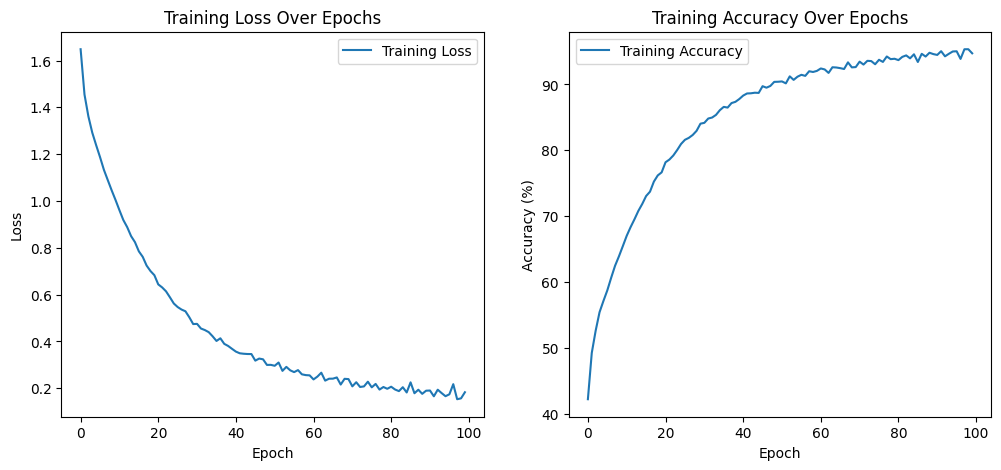

Epoch [1/100], Loss: 1.7135, Accuracy: 39.04%
Epoch [10/100], Loss: 1.1486, Accuracy: 58.91%
Epoch [20/100], Loss: 0.9200, Accuracy: 67.31%
Epoch [30/100], Loss: 0.7891, Accuracy: 72.12%
Epoch [40/100], Loss: 0.6881, Accuracy: 75.77%
Epoch [50/100], Loss: 0.6214, Accuracy: 78.21%
Epoch [60/100], Loss: 0.5615, Accuracy: 80.71%
Epoch [70/100], Loss: 0.5218, Accuracy: 81.99%
Epoch [80/100], Loss: 0.4890, Accuracy: 83.15%
Epoch [90/100], Loss: 0.4547, Accuracy: 84.30%
Epoch [100/100], Loss: 0.4380, Accuracy: 85.21%

Extended Model Training Time: 223.69 seconds
Test Loss: 1.7849, Test Accuracy: 55.50%


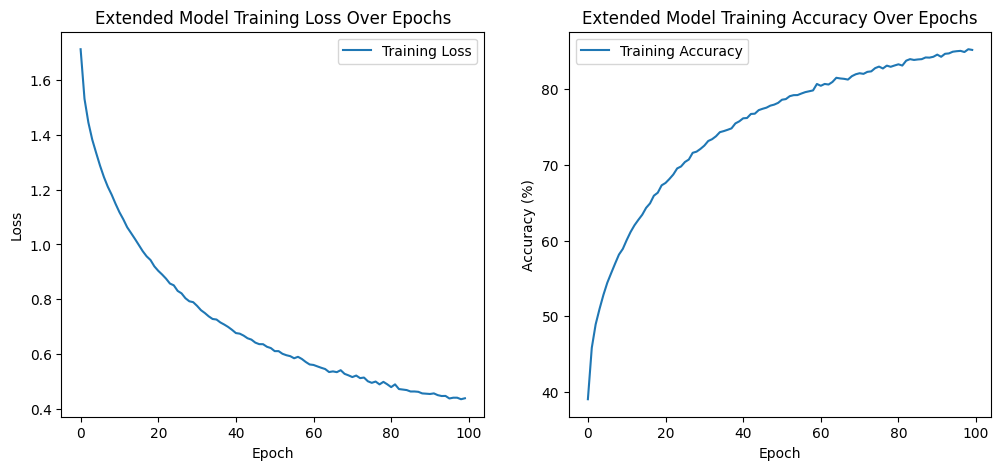

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.Lambda(lambda x: x.view(-1))
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

train_data = []
train_labels = []
for data, target in train_dataset:
    train_data.append(data)
    train_labels.append(target)

train_data = torch.stack(train_data).to(device)
train_labels = torch.tensor(train_labels).to(device)

test_data = []
test_labels = []
for data, target in test_dataset:
    test_data.append(data)
    test_labels.append(target)

test_data = torch.stack(test_data).to(device)
test_labels = torch.tensor(test_labels).to(device)

from torch.utils.data import TensorDataset

train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class NetOneHiddenLayer(nn.Module):
    def __init__(self):
        super(NetOneHiddenLayer, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

net = NetOneHiddenLayer().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

num_epochs = 100
train_losses = []
train_accuracies = []
start_time = time.time()

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    net.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

end_time = time.time()
training_time = end_time - start_time
print(f'\nTraining Time: {training_time:.2f} seconds')


net.eval()
correct = 0
total = 0
test_loss = 0.0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_dataset)
test_accuracy = 100 * correct / total
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()

class NetExtended(nn.Module):
    def __init__(self):
        super(NetExtended, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)

        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)

        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()

        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.relu3(x)

        x = self.fc4(x)
        return x

net_ext = NetExtended().to(device)
criterion_ext = nn.CrossEntropyLoss()
optimizer_ext = optim.Adam(net_ext.parameters(), lr=0.001)

train_losses_ext = []
train_accuracies_ext = []
start_time_ext = time.time()

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    net_ext.train()
    for inputs, labels in train_loader:
        optimizer_ext.zero_grad()
        outputs = net_ext(inputs)
        loss = criterion_ext(outputs, labels)
        loss.backward()
        optimizer_ext.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = 100 * correct / total
    train_losses_ext.append(epoch_loss)
    train_accuracies_ext.append(epoch_acc)

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

end_time_ext = time.time()
training_time_ext = end_time_ext - start_time_ext
print(f'\nExtended Model Training Time: {training_time_ext:.2f} seconds')

net_ext.eval()
correct = 0
total = 0
test_loss_ext = 0.0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = net_ext(inputs)
        loss = criterion_ext(outputs, labels)
        test_loss_ext += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss_ext /= len(test_dataset)
test_accuracy_ext = 100 * correct / total
print(f'Test Loss: {test_loss_ext:.4f}, Test Accuracy: {test_accuracy_ext:.2f}%')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses_ext, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Extended Model Training Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies_ext, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Extended Model Training Accuracy Over Epochs')
plt.legend()
plt.show()
